<a href="https://colab.research.google.com/github/nelslindahlx/NLP/blob/master/visualize_word_frequency_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


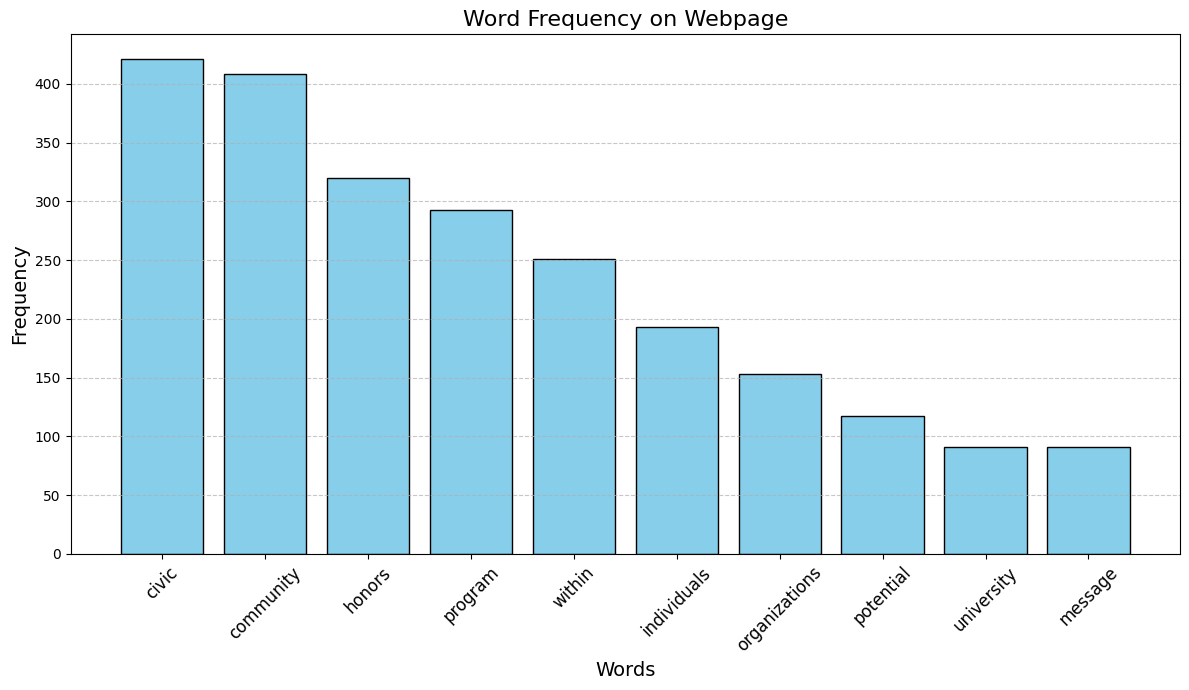

In [1]:
# Install required libraries
!pip install requests beautifulsoup4 matplotlib nltk

# Import required libraries
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download NLTK data for stopwords
nltk.download('stopwords')

# Function to fetch and parse webpage content
def extract_text_from_webpage(url):
    try:
        # Fetch the webpage
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses

        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')

        # Remove script and style elements
        for script_or_style in soup(['script', 'style']):
            script_or_style.decompose()

        # Extract and return text
        return soup.get_text(separator=' ')
    except requests.exceptions.RequestException as e:
        print(f"Error fetching the URL: {e}")
        return ""

# Function to clean and process text
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    # Convert words to lowercase and remove stopwords
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return filtered_words

# Function to analyze word frequency
def analyze_word_frequency(words, num_common=10):
    word_counts = Counter(words)
    return word_counts.most_common(num_common)

# Function to visualize word frequency
def plot_word_frequency(word_frequency):
    words, counts = zip(*word_frequency)
    plt.figure(figsize=(12, 7))
    plt.bar(words, counts, color='skyblue', edgecolor='black')
    plt.xlabel('Words', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Word Frequency on Webpage', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# URL of the webpage to analyze
url = 'https://civichonors.com'

# Step 1: Extract text from the webpage
text = extract_text_from_webpage(url)

# Step 2: Clean and process text
cleaned_words = clean_text(text)

# Step 3: Analyze word frequency
num_common_words = 10  # Customize the number of most common words to visualize
word_frequency = analyze_word_frequency(cleaned_words, num_common=num_common_words)

# Step 4: Visualize word frequency
plot_word_frequency(word_frequency)